### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Users\\rodri\\OneDrive\\Documents\\Projects\\GRETEL stuff\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
# config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc'
# config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_RSGG.jsonc'

# config_f_name = 'ensembles/triplets/TCR-TCO/il-explainer-selector.jsonc'
# config_f_name = 'ensembles/triplets/TCR-TCO/dl-explainer-selector.jsonc'

# config_f_name = 'ensembles/triplets/imdb/iRand.jsonc'
# config_f_name = 'ensembles/imdb/base_explainers_t0/base_explainers_t0_fold0.json'
# config_f_name = 'ensembles/qualitative/clear.jsonc'
# config_f_name = 'ensembles/qualitative/cf2.jsonc'
# config_f_name = 'ensembles/qualitative/union.jsonc'

# # Union
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t1/ensemble_explainers_t1_fold0.json'
# # Intersection
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t2/ensemble_explainers_t2_fold0.json'
# # Frequency
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t3/ensemble_explainers_t3_fold0.json'
# # iRandom
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t4/ensemble_explainers_t4_fold0.json'
# # Stochastic
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t5/ensemble_explainers_t5_fold0.json'
# Bidirectional
# config_f_name = 'ensembles/tcr-tco/ensemble_explainers_t6/ensemble_explainers_t6_fold0.json'

config_f_name = 'generate_minimize/imdb/ofs/ofs-lcls/generate_minimize0.jsonc'
# config_f_name = 'meta/rsgg.jsonc'

# config_f_name = 'metaheuristics/IMDB/IMDB0.json'

### Evaluating the explainer

In [5]:
# config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
# runno = 1
    
# print(f"Generating context for: {config_path}")
# context = Context.get_context(config_path)
# context.run_number = runno

# context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
# context.logger.info("Creating the evaluation manager....................................")

# context.logger.info("Creating the evaluators......................................................")
# eval_manager = EvaluatorManager(context)

In [6]:
# evaluator = eval_manager._evaluators[0]

# n_nodes = [inst.data.shape[0] for inst in evaluator.dataset.instances]
# max(n_nodes)

In [7]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Users\rodri\OneDrive\Documents\Projects\GRETEL stuff\GRETEL\lab\config\generate_minimize/imdb/ofs/ofs-lcls/generate_minimize0.jsonc
2024-11-03 16:05:39,-225480845 | INFO | 21720 - Executing: c:\Users\rodri\OneDrive\Documents\Projects\GRETEL stuff\GRETEL\lab\config\generate_minimize/imdb/ofs/ofs-lcls/generate_minimize0.jsonc Run: 1
2024-11-03 16:05:39,-225480837 | INFO | 21720 - Creating the evaluation manager....................................
2024-11-03 16:05:39,-225480835 | INFO | 21720 - Creating the evaluators......................................................
2024-11-03 16:05:42,-225478099 | INFO | 21720 - Loading: IMDB-BINARY-607bc225e365745075c10dc6732061e7
2024-11-03 16:05:44,-225476120 | INFO | 21720 - Created: IMDB-BINARY-607bc225e365745075c10dc6732061e7
2024-11-03 16:05:44,-225476111 | INFO | 21720 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-11-03 16:05:44,-225476099 | INFO | 21720 - Instantiating: torch.optim.RMSprop
2024-11-03 16:05

In [8]:
exp_inst = []
for exp in eval_manager.evaluators[0]._explanations:
    exp.input_instance._dataset = None
    exp.counterfactual_instances[0]._dataset = None
    
exp_inst = [(exp.input_instance, exp.counterfactual_instances[0]) for exp in eval_manager.evaluators[0]._explanations]

In [9]:
import os
import pickle

pickle_path = os.path.join(module_path, 'lab', 'pickles', 'union.pkl')
pickle_dir = os.path.dirname(pickle_path)

if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(exp_inst, pickle_file)

In [10]:
with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

### Aggregating the stats

In [11]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(DCESExplainer-LocalSearch),2.417725,0.0,6.272727,0.0,1.000000,0.0,13383.000000,0.0,0.727273,0.0,0.014107,0.0,0.454545,0.0,0.997501,0.0
1,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(DCESExplainer-LocalSearchMult...,3.875766,0.0,6.363636,0.0,1.000000,0.0,22879.272727,0.0,0.727273,0.0,0.014314,0.0,0.454545,0.0,0.998349,0.0
2,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(DCESExplainer-LocalSearchMult...,2.934646,0.0,6.545455,0.0,1.000000,0.0,13905.090909,0.0,0.727273,0.0,0.014724,0.0,0.454545,0.0,0.999998,0.0
3,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(DCESExplainer-Random),26.805308,0.0,277.363636,0.0,1.000000,0.0,1155.000000,0.0,0.727273,0.0,0.624038,0.0,0.454545,0.0,0.738507,0.0
4,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(OFS-LocalSearch),2.500193,0.0,6.400000,0.0,0.909091,0.0,13844.818182,0.0,0.727273,0.0,0.014405,0.0,0.545455,0.0,1.001824,0.0
5,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(OFS-LocalSearchMultiSolutions),3.602474,0.0,6.400000,0.0,0.909091,0.0,21455.272727,0.0,0.727273,0.0,0.014405,0.0,0.545455,0.0,1.001480,0.0
6,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(OFS-Random),74.254606,0.0,9.750000,0.0,0.727273,0.0,3291.363636,0.0,0.727273,0.0,0.021960,0.0,0.727273,0.0,1.000406,0.0
7,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(RSGG-LocalSearch),58.709769,0.0,5.000000,0.0,0.363636,0.0,4176.363636,0.0,0.727273,0.0,0.011206,0.0,0.181818,0.0,0.996504,0.0
8,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(RSGG-LocalSearchMultiSolutions),61.502461,0.0,6.333333,0.0,0.272727,0.0,5771.000000,0.0,0.727273,0.0,0.014186,0.0,0.272727,0.0,0.997134,0.0
9,meta,ASD-a90450198d54af7520c0a579af443e89,ASDOracle-12b3e9daa577d8245fb63e12b30ea64d,GenerateMinimize(RSGG-Random),78.291979,0.0,172.666667,0.0,0.272727,0.0,1739.363636,0.0,0.727273,0.0,0.387145,0.0,0.272727,0.0,0.936834,0.0


### Visualizing individual instances

In [12]:
evaluator = eval_manager.evaluators[0]
evaluator

In [13]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

# Drawing Instances

In [14]:
import pickle

with open(os.path.join(module_path, 'lab', 'pickles', 'cf2.pkl'), 'rb') as cf2_file:
    cf2_exp = pickle.load(cf2_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'clear.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'irand.pkl'), 'rb') as irand_file:
    irand_exp = pickle.load(irand_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'obs.pkl'), 'rb') as obs_file:
    obs_exp = pickle.load(obs_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'rsgg.pkl'), 'rb') as rsgg_file:
    rsgg_exp = pickle.load(rsgg_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'bidirectional.pkl'), 'rb') as bi_file:
    bi_exp = pickle.load(bi_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as union_file:
    union_exp = pickle.load(union_file)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\rodri\\OneDrive\\Documents\\Projects\\GRETEL stuff\\GRETEL\\lab\\pickles\\cf2.pkl'

In [ ]:
i = 7

og_inst = cf2_exp[i][0]
cf2_cf = cf2_exp[i][1]
print(og_inst.id, cf2_cf.id)

clear_cf = clear_exp[i][1]
print(clear_exp[i][0].id, clear_cf.id)

irand_cf = irand_exp[i][1]
print(irand_exp[i][0].id, irand_cf.id)

obs_cf = obs_exp[i][1]
print(obs_exp[i][0].id, obs_cf.id)

rsgg_cf = rsgg_exp[i][1]
print(rsgg_exp[i][0].id, rsgg_cf.id)

union_cf = union_exp[i][1]
print(union_exp[i][0].id, union_cf.id)

bi_cf = bi_exp[i][1]
print(bi_exp[i][0].id, bi_cf.id)

7 7
7 7
7 7
7 7
7 7
7 7
7 7


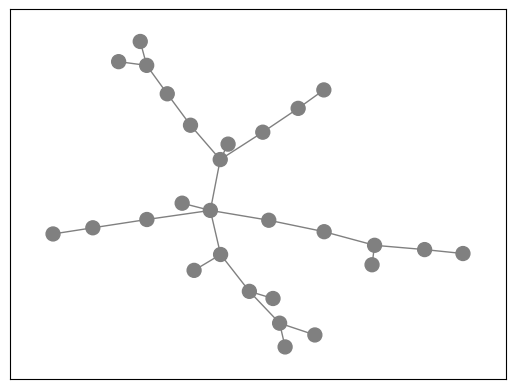

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

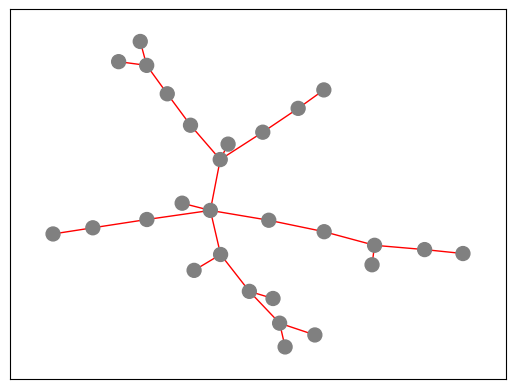

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf2_cf, position=pos)

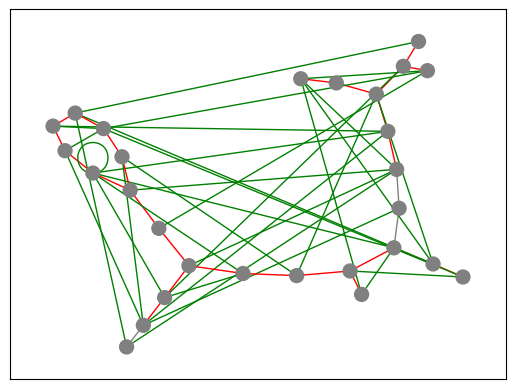

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, clear_cf, position=pos)

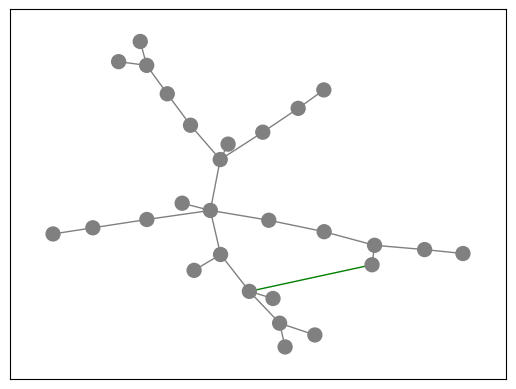

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, irand_cf, position=pos)

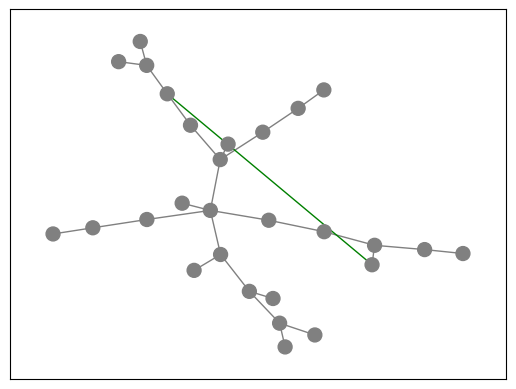

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, obs_cf, position=pos)

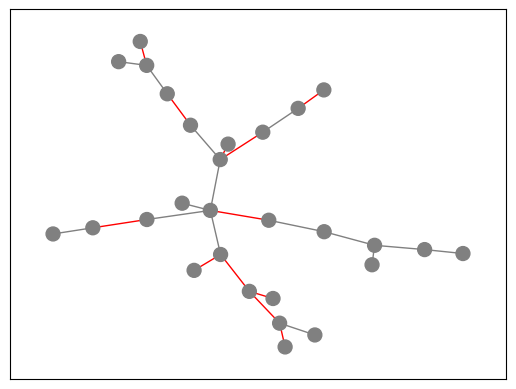

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, rsgg_cf, position=pos)

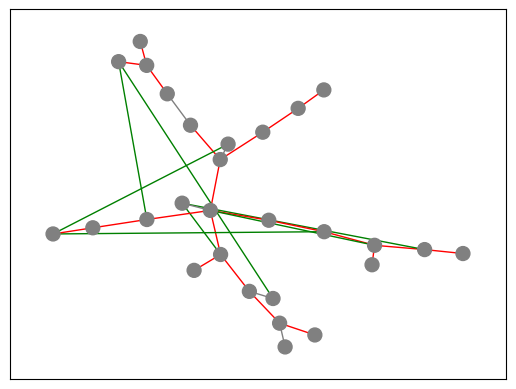

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, union_cf, position=pos)

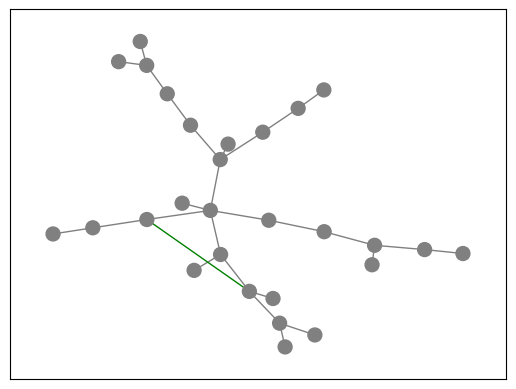

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, bi_cf, position=pos)

# End Paper Experiments

In [ ]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [ ]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)